<a href="https://colab.research.google.com/github/baruchais/Cleaning_and_Visualizing_Data/blob/main/Cleaning_and_Visualizing_Data_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the workshop!
Explore how to clean and visualize data with Baruch AIS!


# Pandas and Numpy
Documentation:

*    https://pandas.pydata.org/docs/
*    https://numpy.org/doc/


#What is dirty data?
It basically is faulty data. Data that inconsistent,inaccurate, or incomplete.

#So how do we fix this?
Simple: Exploratory Data Analysis

#EDA: Exploratory Data Analysis
  We do EDA to understand our data set and find patterns within it. We want to find its main characteristics.
  

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#loading in dataset
df=pd.read_csv("/content/iris.csv")
#checking the first 10 values
df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#checking last 10 values
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,class
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
150,NaN,NaN,NaN,NaN,Iris-virginica
151,59.0,30.0,51.0,20.0,Iris-virginica
152,59.0,30.0,51.0,20.0,Iris-virginica
153,59.0,30.0,51.0,20.0,Iris-virginica


In [ ]:
#seeing the shape of the data set
df.shape

(154, 5)

In [ ]:
#seeing what columns we have
list(df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [ ]:
#statistical overview
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,153.000000,153.000000,153.000000,153.000000
mean,6.885621,3.582353,4.684967,1.567320
std,7.439603,3.772792,6.799679,2.722297
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,59.000000,30.000000,51.000000,20.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  153 non-null    float64
 1   sepal_width   153 non-null    float64
 2   petal_length  153 non-null    float64
 3   petal_width   153 non-null    float64
 4   class         154 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


In [ ]:
'''
First step  when cleaning data is to check duplicate rows
The pandas function .duplicated() checks each row
to see if it is duplicated
'''
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
149    False
150    False
151    False
152     True
153     True
Length: 154, dtype: bool

Why do you guys think about viewing duplicated data like this?
Is it easy to see which rows are duplicated?

In [ ]:
#Finding amount of duplicated rows
df.duplicated().sum()

5

In [ ]:
#Now we want to drop those 5 rows
df=df.drop_duplicates()

In [ ]:
#Let's check if it has removed those rows
df.duplicated().sum()

0

In [ ]:
#seeing the unique values to see duplicates but df.duplicates is better
df.nunique()

sepal_length    36
sepal_width     24
petal_length    44
petal_width     23
class            3
dtype: int64

In [ ]:
'''
Next step is to remove null values
'''

'\nNext step is to remove null values\n'

In [ ]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
147,False,False,False,False,False
148,False,False,False,False,False
149,False,False,False,False,False
150,True,True,True,True,False


In [ ]:
#Again just like before, it is hard to see whihc values have null values
df.isnull().sum()

sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
class           0
dtype: int64

In [ ]:
#we could also check for change in shape
df.shape

(149, 5)

In [ ]:
#lets drop the null values
df=df.dropna()

In [ ]:
#change in shape
df.shape

(148, 5)

In [ ]:
#double checking we removed the values
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# What else can we do if we dont want to drop a feature?
We can also replace these values. If you have numerical data you have the option of filling it with 0 or any any other statistical measure. For strings, you can replace with a space '' or whatever word you want basically.

*   df.fiillna()







In [ ]:
'''
The next step is to check for sturctural errors;usally only happens in
categorical features
'''

'\nThe next step is to check for sturctural errors;usally only happens in\ncategorical features\n'

In [ ]:
#seeing the unique values
df.nunique()

sepal_length    36
sepal_width     24
petal_length    44
petal_width     23
class            3
dtype: int64

In [ ]:
#we can see that in this data set there is no structural errors.
#How do I know this?

If we do have a structural error, you can just fix it by checking that row and using fillna() to change that value.

In [ ]:
#Our final step is to check for outliers.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,148.000000,148.000000,148.000000
mean,6.215541,3.237838,4.099324,1.335811
std,4.445830,2.257215,4.258988,1.719398
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,59.000000,30.000000,51.000000,20.000000


In [ ]:
#Looking at our min and max, does any one see anything weird?

Let's use some visualization to see this!

<Axes: >

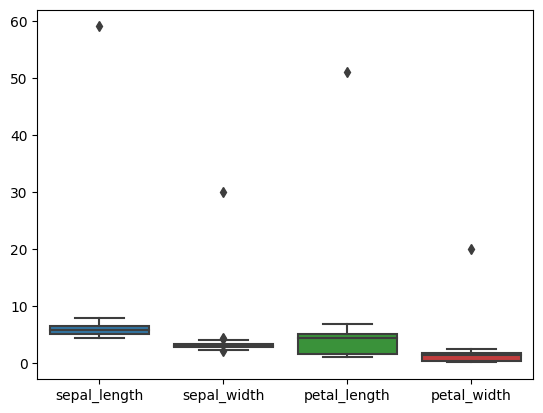

In [ ]:
sns.boxplot(df)

In [ ]:
#Those dots are indicating that we have outliers, so lets remove them.
#There are many ways to do this but I will show one way

In [ ]:
#finding which row this value is in
condition = df['sepal_length'] > 20
print(df[condition])

     sepal_length  sepal_width  petal_length  petal_width           class
151          59.0         30.0          51.0         20.0  Iris-virginica


In [ ]:
#lets drop this row
df=df.drop(151)

<Axes: >

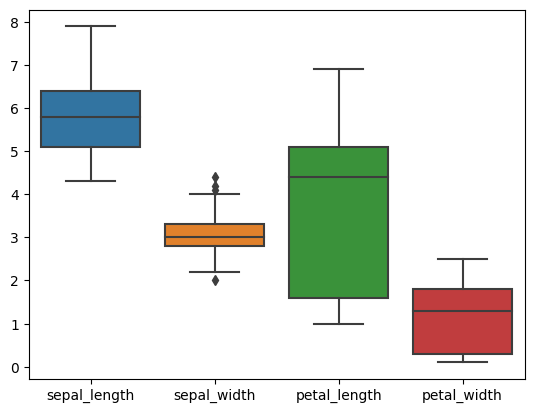

In [ ]:
sns.boxplot(df)

In [ ]:
#Now lets do some visulization

Depending on what you want to do, there are different types of charts

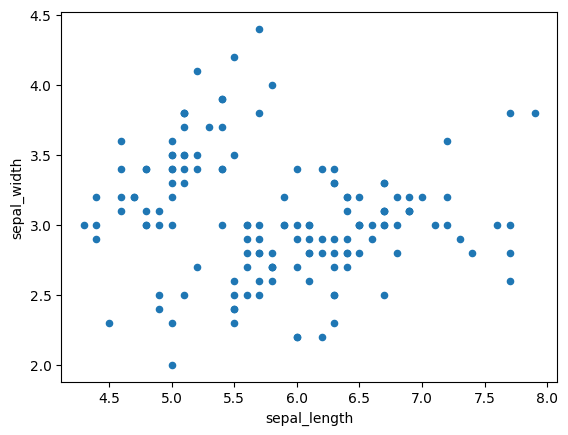

In [ ]:
#creating scatter plot to see if there is correlation between sepal length and width
df.plot(kind="scatter", x="sepal_length", y="sepal_width")
plt.show()

<Axes: >

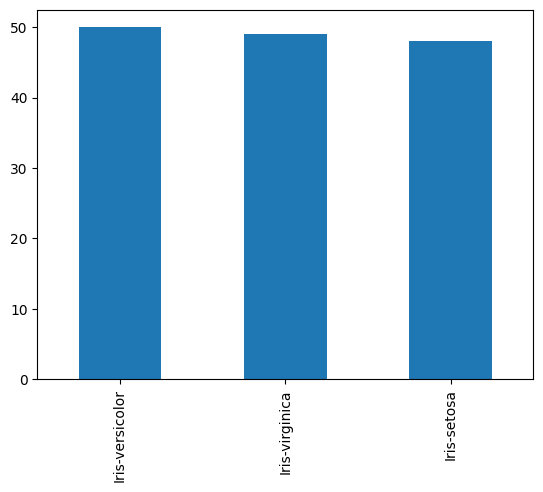

In [ ]:
#creating bar chart to see how many values are in each class
condition=df['class'].value_counts()
condition.plot(kind = 'bar')

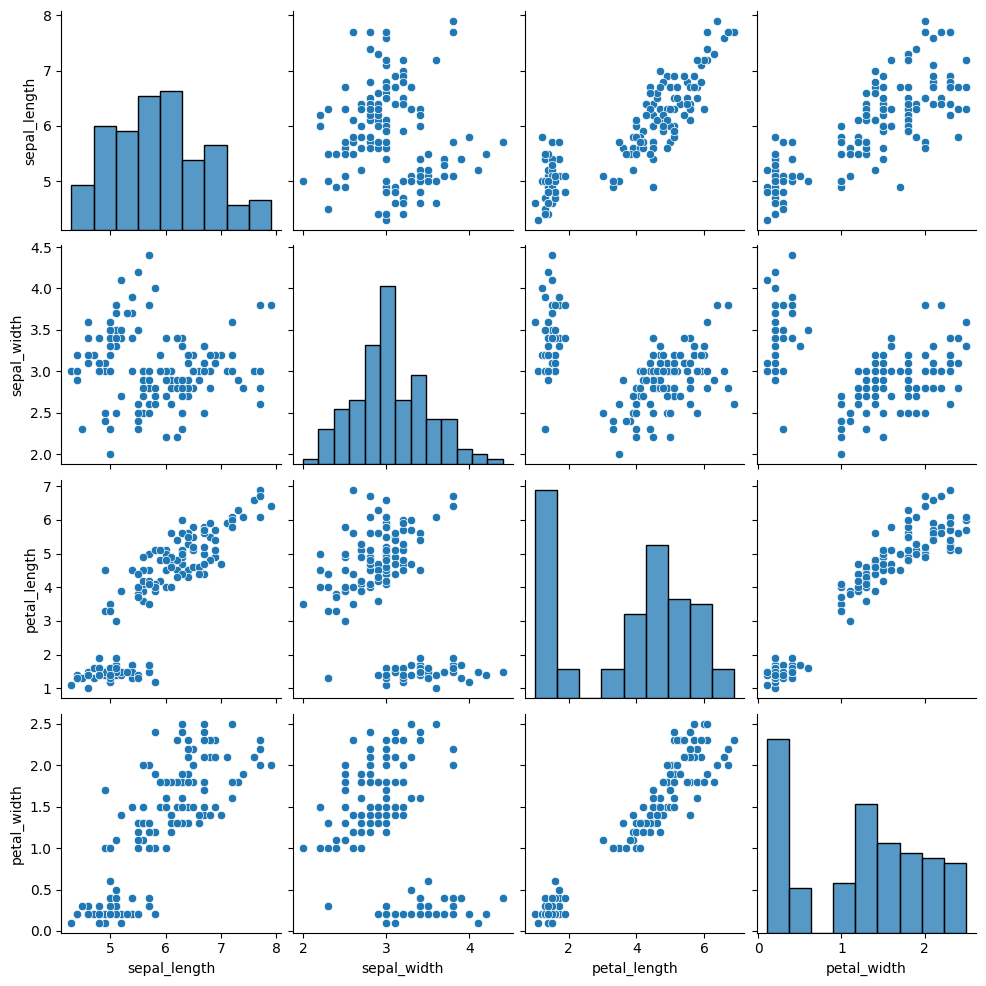

In [ ]:
#creating a pairplot to see al linear relationships
sns.pairplot(data=df)

  IF WE HAVE EXTRA TIME:

#What is feature engineering?
  Basically when you deciding features, aka columns, to keep or remove from the data.  

*   Usally done when the feature is not correlated at all or there is multicollinarity
*   This is another important step in the data cleaning process and comes into play usually for machine leanring models.


In [ ]:
#correlation
df.corr()

<ipython-input-94-09c10a9c2dc7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<ipython-input-95-8102a7478fa7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

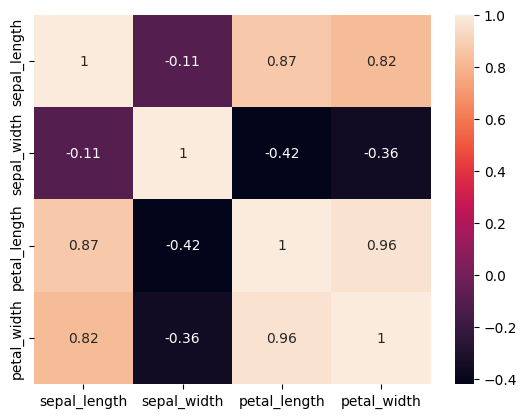

In [ ]:
#heatmap
sns.heatmap(df.corr(),annot=True)
#annot true gives us number in each cell